# Urban Sound Classification - Data Preprocessing

## Fetch Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
import soundfile

In [62]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("../UrbanSound8K/metadata/UrbanSound8K.csv")

In [63]:
#head of the dataframe
data.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,UrbanSound8K.csv,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [64]:
#count of datapoints in each of the folders
data["fold"].value_counts()

fold
4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: count, dtype: int64

## Data Visualisation

In [65]:
from librosa import display
import librosa

In [66]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("../UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=36)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=438
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=219
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(


((36, 14), (36, 14), (36, 14), (36, 14), (36, 14))

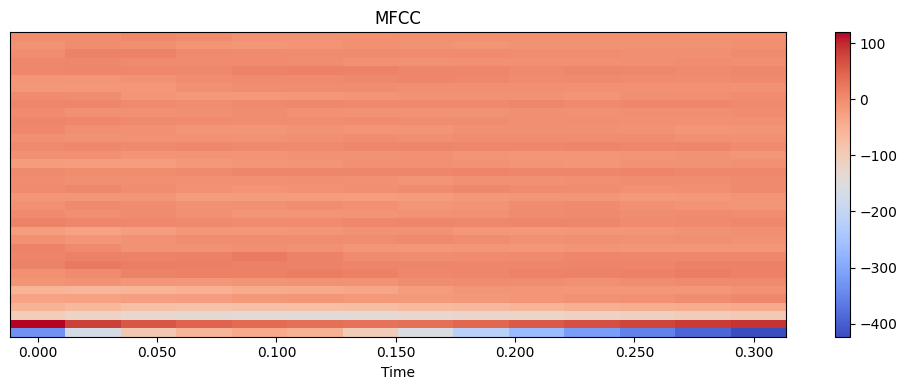

In [67]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

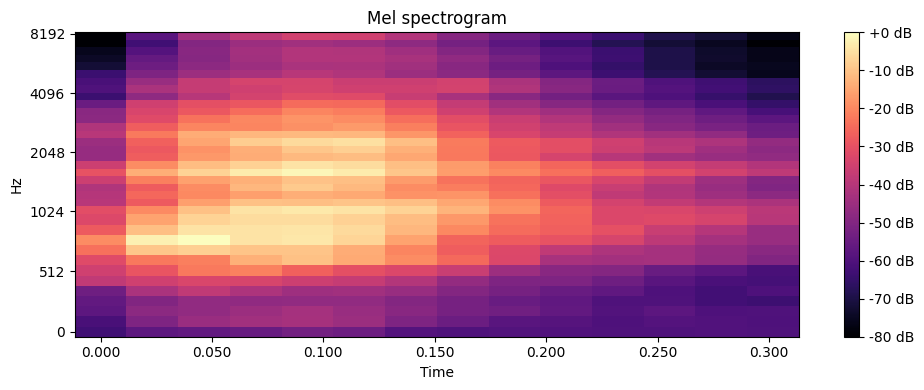

In [68]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

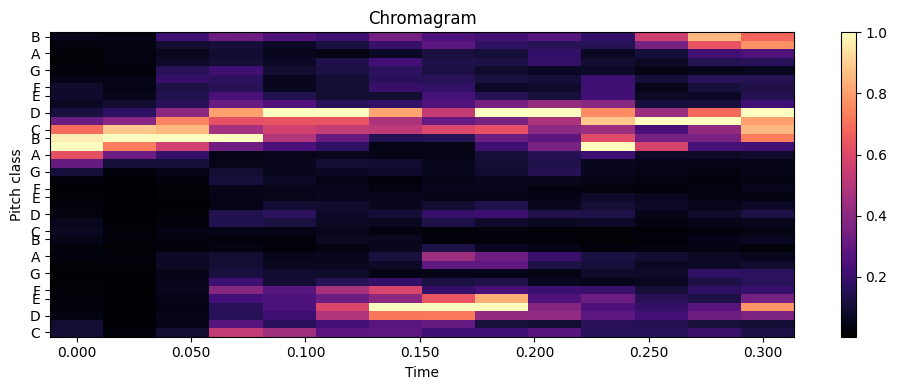

In [69]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

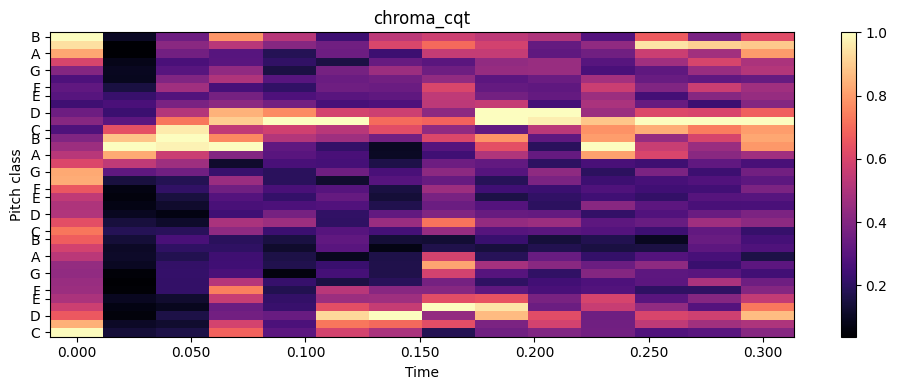

In [70]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

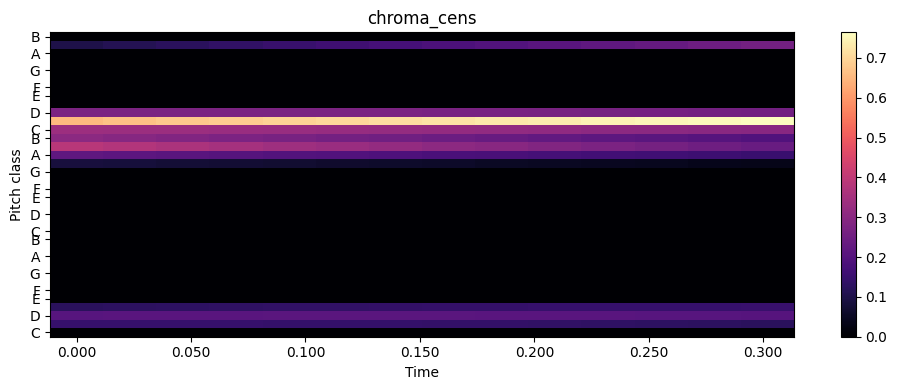

In [71]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

## Data Preprocessing

In [72]:
#feature set
y,sr=librosa.load("../UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=438
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=219
  warnings.warn(
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(


((36,), (36,), (36,), (36,), (36,))

In [73]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
features.shape

(36, 5)

In [75]:
#preprocessing using only mfcc
x_data=[ [] for _ in range(10) ]
y_label=[ [] for _ in range(10) ]
path="../UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    print(filename)
    # y,sr=librosa.load(filename)
    # mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    # x_data[int(fold_no)-1].append(mfccs)
    # y_label[int(fold_no)-1].append(label)

  7%|▋         | 582/8732 [00:00<00:01, 5792.85it/s]

../UrbanSound8K/audio/fold5/UrbanSound8K.csv
../UrbanSound8K/audio/fold5/100263-2-0-117.wav
../UrbanSound8K/audio/fold5/100263-2-0-121.wav
../UrbanSound8K/audio/fold5/100263-2-0-126.wav
../UrbanSound8K/audio/fold5/100263-2-0-137.wav
../UrbanSound8K/audio/fold5/100263-2-0-143.wav
../UrbanSound8K/audio/fold5/100263-2-0-161.wav
../UrbanSound8K/audio/fold5/100263-2-0-3.wav
../UrbanSound8K/audio/fold5/100263-2-0-36.wav
../UrbanSound8K/audio/fold10/100648-1-0-0.wav
../UrbanSound8K/audio/fold10/100648-1-1-0.wav
../UrbanSound8K/audio/fold10/100648-1-2-0.wav
../UrbanSound8K/audio/fold10/100648-1-3-0.wav
../UrbanSound8K/audio/fold10/100648-1-4-0.wav
../UrbanSound8K/audio/fold2/100652-3-0-0.wav
../UrbanSound8K/audio/fold2/100652-3-0-1.wav
../UrbanSound8K/audio/fold2/100652-3-0-2.wav
../UrbanSound8K/audio/fold2/100652-3-0-3.wav
../UrbanSound8K/audio/fold10/100795-3-0-0.wav
../UrbanSound8K/audio/fold10/100795-3-1-0.wav
../UrbanSound8K/audio/fold10/100795-3-1-1.wav
../UrbanSound8K/audio/fold10/10079

 28%|██▊       | 2412/8732 [00:00<00:01, 6081.86it/s]

../UrbanSound8K/audio/fold1/125791-3-0-13.wav
../UrbanSound8K/audio/fold1/125791-3-0-15.wav
../UrbanSound8K/audio/fold1/125791-3-0-9.wav
../UrbanSound8K/audio/fold8/126153-9-0-0.wav
../UrbanSound8K/audio/fold8/126153-9-0-1.wav
../UrbanSound8K/audio/fold8/126153-9-0-11.wav
../UrbanSound8K/audio/fold8/126153-9-0-4.wav
../UrbanSound8K/audio/fold8/126153-9-0-5.wav
../UrbanSound8K/audio/fold8/126153-9-0-6.wav
../UrbanSound8K/audio/fold8/126153-9-0-8.wav
../UrbanSound8K/audio/fold3/12647-3-0-0.wav
../UrbanSound8K/audio/fold3/12647-3-1-0.wav
../UrbanSound8K/audio/fold3/12647-3-2-0.wav
../UrbanSound8K/audio/fold3/12647-3-3-0.wav
../UrbanSound8K/audio/fold5/126521-3-0-12.wav
../UrbanSound8K/audio/fold5/126521-3-0-17.wav
../UrbanSound8K/audio/fold5/126521-3-0-18.wav
../UrbanSound8K/audio/fold5/126521-3-0-2.wav
../UrbanSound8K/audio/fold7/127443-4-0-0.wav
../UrbanSound8K/audio/fold7/127443-4-0-1.wav
../UrbanSound8K/audio/fold7/127443-4-0-10.wav
../UrbanSound8K/audio/fold7/127443-4-0-11.wav
../Urb

 48%|████▊     | 4162/8732 [00:00<00:00, 5560.30it/s]

../UrbanSound8K/audio/fold2/156893-7-1-0.wav
../UrbanSound8K/audio/fold2/156893-7-10-0.wav
../UrbanSound8K/audio/fold2/156893-7-11-0.wav
../UrbanSound8K/audio/fold2/156893-7-2-0.wav
../UrbanSound8K/audio/fold2/156893-7-3-0.wav
../UrbanSound8K/audio/fold2/156893-7-4-0.wav
../UrbanSound8K/audio/fold2/156893-7-5-0.wav
../UrbanSound8K/audio/fold2/156893-7-6-0.wav
../UrbanSound8K/audio/fold2/156893-7-7-0.wav
../UrbanSound8K/audio/fold2/156893-7-8-0.wav
../UrbanSound8K/audio/fold2/156893-7-9-0.wav
../UrbanSound8K/audio/fold4/156897-6-0-0.wav
../UrbanSound8K/audio/fold10/157207-6-0-0.wav
../UrbanSound8K/audio/fold10/157207-6-1-0.wav
../UrbanSound8K/audio/fold10/157207-6-10-0.wav
../UrbanSound8K/audio/fold10/157207-6-2-0.wav
../UrbanSound8K/audio/fold10/157207-6-3-0.wav
../UrbanSound8K/audio/fold10/157207-6-4-0.wav
../UrbanSound8K/audio/fold10/157207-6-5-0.wav
../UrbanSound8K/audio/fold10/157207-6-6-0.wav
../UrbanSound8K/audio/fold10/157207-6-7-0.wav
../UrbanSound8K/audio/fold10/157207-6-8-0.w

 61%|██████    | 5342/8732 [00:00<00:00, 5421.36it/s]

../UrbanSound8K/audio/fold9/180029-4-1-0.wav
../UrbanSound8K/audio/fold9/180029-4-10-0.wav
../UrbanSound8K/audio/fold9/180029-4-11-0.wav
../UrbanSound8K/audio/fold9/180029-4-12-0.wav
../UrbanSound8K/audio/fold9/180029-4-13-0.wav
../UrbanSound8K/audio/fold9/180029-4-14-0.wav
../UrbanSound8K/audio/fold9/180029-4-15-0.wav
../UrbanSound8K/audio/fold9/180029-4-16-0.wav
../UrbanSound8K/audio/fold9/180029-4-19-0.wav
../UrbanSound8K/audio/fold9/180029-4-2-0.wav
../UrbanSound8K/audio/fold9/180029-4-20-0.wav
../UrbanSound8K/audio/fold9/180029-4-4-0.wav
../UrbanSound8K/audio/fold9/180029-4-5-0.wav
../UrbanSound8K/audio/fold9/180029-4-6-0.wav
../UrbanSound8K/audio/fold9/180029-4-7-0.wav
../UrbanSound8K/audio/fold9/180029-4-8-0.wav
../UrbanSound8K/audio/fold9/180029-4-9-0.wav
../UrbanSound8K/audio/fold5/180052-3-0-0.wav
../UrbanSound8K/audio/fold5/180052-3-0-1.wav
../UrbanSound8K/audio/fold5/180052-3-0-3.wav
../UrbanSound8K/audio/fold5/180052-3-0-4.wav
../UrbanSound8K/audio/fold3/180057-9-0-11.wav


 81%|████████▏ | 7111/8732 [00:01<00:00, 5734.64it/s]

../UrbanSound8K/audio/fold5/23219-5-1-1.wav
../UrbanSound8K/audio/fold5/23219-5-1-2.wav
../UrbanSound8K/audio/fold1/24074-1-0-0.wav
../UrbanSound8K/audio/fold1/24074-1-0-1.wav
../UrbanSound8K/audio/fold1/24074-1-0-10.wav
../UrbanSound8K/audio/fold1/24074-1-0-11.wav
../UrbanSound8K/audio/fold1/24074-1-0-12.wav
../UrbanSound8K/audio/fold1/24074-1-0-13.wav
../UrbanSound8K/audio/fold1/24074-1-0-2.wav
../UrbanSound8K/audio/fold1/24074-1-0-3.wav
../UrbanSound8K/audio/fold1/24074-1-0-4.wav
../UrbanSound8K/audio/fold1/24074-1-0-5.wav
../UrbanSound8K/audio/fold1/24074-1-0-6.wav
../UrbanSound8K/audio/fold1/24074-1-0-7.wav
../UrbanSound8K/audio/fold1/24074-1-0-8.wav
../UrbanSound8K/audio/fold1/24074-1-0-9.wav
../UrbanSound8K/audio/fold10/24076-1-0-0.wav
../UrbanSound8K/audio/fold10/24076-1-1-0.wav
../UrbanSound8K/audio/fold4/24347-8-0-0.wav
../UrbanSound8K/audio/fold4/24347-8-0-1.wav
../UrbanSound8K/audio/fold4/24347-8-0-10.wav
../UrbanSound8K/audio/fold4/24347-8-0-11.wav
../UrbanSound8K/audio/fo

100%|██████████| 8732/8732 [00:01<00:00, 5799.86it/s]

../UrbanSound8K/audio/fold3/62837-7-0-21.wav
../UrbanSound8K/audio/fold3/62837-7-0-22.wav
../UrbanSound8K/audio/fold3/62837-7-0-24.wav
../UrbanSound8K/audio/fold3/62837-7-0-27.wav
../UrbanSound8K/audio/fold3/62837-7-0-28.wav
../UrbanSound8K/audio/fold3/62837-7-0-3.wav
../UrbanSound8K/audio/fold3/62837-7-0-30.wav
../UrbanSound8K/audio/fold3/62837-7-0-31.wav
../UrbanSound8K/audio/fold3/62837-7-0-34.wav
../UrbanSound8K/audio/fold3/62837-7-0-37.wav
../UrbanSound8K/audio/fold3/62837-7-0-4.wav
../UrbanSound8K/audio/fold3/62837-7-0-7.wav
../UrbanSound8K/audio/fold3/62837-7-0-8.wav
../UrbanSound8K/audio/fold3/62837-7-0-9.wav
../UrbanSound8K/audio/fold3/62837-7-1-1.wav
../UrbanSound8K/audio/fold3/62837-7-1-11.wav
../UrbanSound8K/audio/fold3/62837-7-1-14.wav
../UrbanSound8K/audio/fold3/62837-7-1-15.wav
../UrbanSound8K/audio/fold3/62837-7-1-18.wav
../UrbanSound8K/audio/fold3/62837-7-1-2.wav
../UrbanSound8K/audio/fold3/62837-7-1-21.wav
../UrbanSound8K/audio/fold3/62837-7-1-22.wav
../UrbanSound8K/a

In [76]:
#preprocessing using entire feature set
x_data=[ [] for _ in range(10) ]
y_label=[ [] for _ in range(10) ]
path="../UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path + fold_no + "/" +file
    y,sr = librosa.load(filename)
    # y,sr=librosa.load("../UrbanSound8K/audio/fold5/100032-3-0-0.wav")
    # mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=36).T,axis=0)
    # melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    # chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    # chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    # chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    # features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    # x_data[int(fold_no)-1].append(features)
    # y_label[int(fold_no)-1].append(label)

  0%|          | 0/8732 [00:00<?, ?it/s]C:\Users\novin\AppData\Local\Temp\ipykernel_14880\3559283101.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr = librosa.load(filename)
C:\Users\novin\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  0%|          | 0/8732 [00:00<?, ?it/s]


NoBackendError: 

In [27]:
sum([len(x) for x in x_data])

0

In [28]:
len(data)

8732

### Augmented Data

In [76]:
def standard_process(y, sr=22050):
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    return features

In [77]:
# Time stretching
def time_stretching(rate, sound_clip):
    sound_clip = librosa.effects.time_stretch(sound_clip, rate = rate)
    return standard_process(sound_clip)

In [78]:
# Pitch shifting
# tone_steps = [-2, 0, 2]
def pitch_shifting(tone_step, sound_clip, sr=22050):
    sound_clip = librosa.effects.pitch_shift(sound_clip, sr, n_steps = tone_step)
    return standard_process(sound_clip)

In [79]:
# Noise Addition
def add_noise(sound_clip):
    noise = np.random.rand(len(sound_clip))
    noise = np.ones(len(sound_clip))
    noise_amp = np.random.uniform(0.005, 0.008)
    noisy_sound_clip = sound_clip + (noise_amp * noise)
    return standard_process(noisy_sound_clip)

#### Examples

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

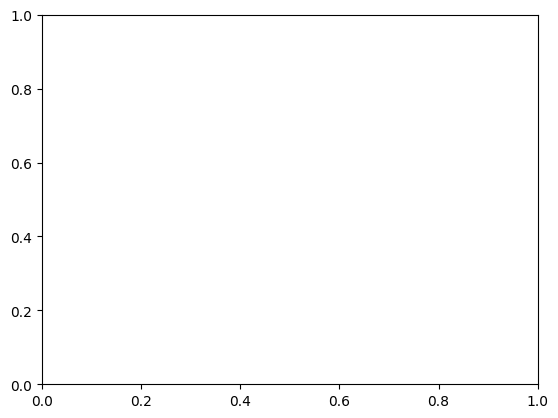

In [80]:
filename = "../UrbanSound8K/audio/fold5/100263-2-0-137.wav"
y, sr = librosa.load(filename)
librosa.display.waveshow(y=y, sr=sr)
signal = y
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel spectrogram')
plt.tight_layout()

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

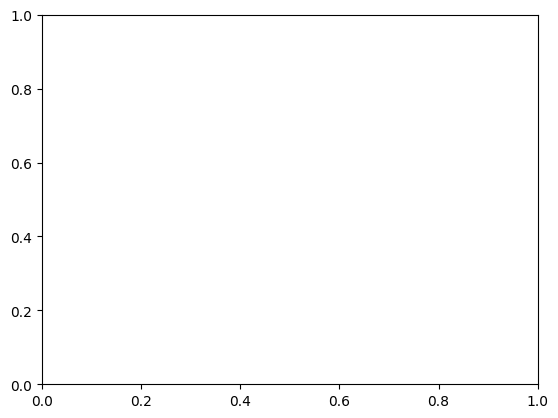

In [82]:
sound_clip = librosa.effects.time_stretch(y, rate = 1.5)
librosa.display.waveshow(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Timestretched Mel spectrogram')
plt.tight_layout()

In [83]:
sound_clip = librosa.effects.pitch_shift(y, sr, n_steps = 3.5)
librosa.display.waveplot(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Pitch Shifted Mel spectrogram')
plt.tight_layout()

TypeError: pitch_shift() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [84]:
def get_noisy_sound(sound_clip):
    noise = np.random.rand(len(sound_clip))
    noise = np.ones(len(sound_clip))
    noise_amp = np.random.uniform(0.005, 0.008)
    noisy_sound_clip = sound_clip + (noise_amp * noise)
    return noisy_sound_clip

sound_clip = get_noisy_sound(y)
librosa.display.waveplot(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Noise Added Mel spectrogram')
plt.tight_layout()

AttributeError: module 'librosa.display' has no attribute 'waveplot'

In [60]:
#preprocessing using entire feature set
x_aug_data=x_data
y_aug_label=y_label
path="../UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    
    #time-stretched
    rate=1.5
    time_stretched = time_stretching(rate, y)
    x_aug_data[int(fold_no)-1].append(time_stretched)
    y_aug_label[int(fold_no)-1].append(label)

    #pitch-shifted
    tone_step=2
    pitch_shifted = pitch_shifting(tone_step, y)
    x_aug_data[int(fold_no)-1].append(pitch_shifted)
    y_aug_label[int(fold_no)-1].append(label)
    
    #noise added
    noisy_sound = add_noise(y)
    x_aug_data[int(fold_no)-1].append(noisy_sound)
    y_aug_label[int(fold_no)-1].append(label)

  0%|          | 0/8732 [00:00<?, ?it/s]


AttributeError: module 'soundfile' has no attribute 'SoundFileRuntimeError'

## Store Processed Data

In [ ]:
import pickle as pkl

with open("x_data.pickle","wb") as f:
    pkl.dump(x_data, f)

with open("y_label.pickle","wb") as f:
    pkl.dump(y_label, f)

In [ ]:
with open("x_aug_data.pickle","wb") as f:
    pkl.dump(x_aug_data, f)

with open("y_aug_label.pickle","wb") as f:
    pkl.dump(y_aug_label, f)